In [20]:
import numpy as np
n = 1000
set1 = np.random.multivariate_normal(mean=[0, 3], cov=[[1,0.5],[0.5,1]], size=n)
set2 = np.random.multivariate_normal(mean=[3, 0], cov=[[1,0.5],[0.5,1]], size=n)
inputs = np.vstack((set1,set2)).astype(np.float32)
targets = np.vstack((np.zeros((n,1), dtype="float32"),
                     np.ones((n,1), dtype="float32")))

In [3]:
print(inputs.shape)

(2000, 2)


In [21]:
import tensorflow as tf
input_dim = 2
output_dim = 1
W = tf.Variable(tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(tf.zeros(shape=(output_dim,)))
def model(inputs):
  return tf.matmul(inputs, W) + b

print(W.shape)
print(b.shape)

(2, 1)
(1,)


In [15]:
d = tf.matmul(inputs,W)
print(d.shape)

(2000, 1)


In [16]:
def loss(targets, predictions):
  return tf.reduce_mean(tf.square(targets-predictions))
def training_step(inputs, targets):
  with tf.GradientTape() as tape:
    predictions = model(inputs)
    L = loss(targets, predictions)
  dL_dW, dL_db = tape.gradient(L, [W, b])
  W.assign_sub(lr*dL_dW)
  b.assign_sub(lr*dL_db)
  return L


In [22]:
lr = 0.1
max_epoch = 100
L = np.zeros(max_epoch)
for epoch in range(max_epoch):
  L[epoch] = training_step(inputs, targets)


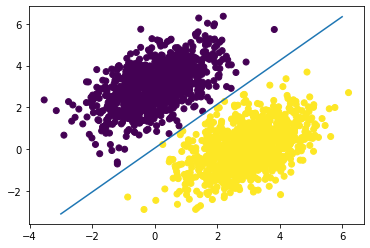

In [26]:
import matplotlib.pyplot as plt
predictions = model(inputs)
x1 = np.linspace(-3, 6, 100)
x2 = (b-0.5-W[0]*x1)/W[1]
plt.scatter(inputs[:,0], inputs[:,1], c=predictions[:,0]>0.5)
plt.plot(x1,x2); plt.show()


In [42]:
import numpy as np
n = 1000
set1 = np.random.multivariate_normal(mean=[0, 3], cov=[[1,0.5],[0.5,1]], size=n)
set2 = np.random.multivariate_normal(mean=[3, 0], cov=[[1,0.5],[0.5,1]], size=500)
set3 = np.random.multivariate_normal(mean=[-2, -1], cov=[[-1,0.5],[0.5,-1]], size=500)
inputs = np.vstack((set1,set2,set3)).astype(np.float32)
targets = np.vstack((np.zeros((n,1), dtype="float32"),
                     np.ones((n,1), dtype="float32")))

C:\Users\chaiw\AppData\Local\Temp/ipykernel_12684/920155525.py:5: RuntimeWarning: covariance is not positive-semidefinite.
  set3 = np.random.multivariate_normal(mean=[-2, -1], cov=[[-1,0.5],[0.5,-1]], size=500)


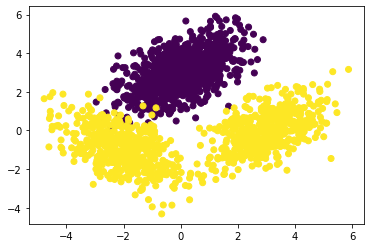

In [43]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:,0], inputs[:,1], c=targets[:,0])
plt.show()


In [66]:
import tensorflow as tf
input_dim = 2
output_dim = 1
W = tf.Variable(tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(tf.zeros(shape=(output_dim,)))
def model(inputs):
  return tf.matmul(inputs, W) + b
#   return tf.math.sigmoid(tf.matmul(inputs, W) + b)

def loss(targets, predictions):
  return tf.reduce_mean(tf.square(targets-predictions))
def training_step(inputs, targets):
  with tf.GradientTape() as tape:
    predictions = model(inputs)
    L = loss(targets, predictions)
  dL_dW, dL_db = tape.gradient(L, [W, b])
  W.assign_sub(lr*dL_dW)
  b.assign_sub(lr*dL_db)
  return L


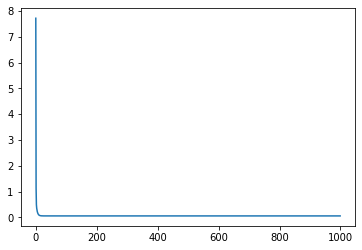

In [67]:
lr = 0.1
max_epoch = 1000
L = np.zeros(max_epoch)
for epoch in range(max_epoch):
  L[epoch] = training_step(inputs, targets)
plt.plot(np.arange(max_epoch),L)

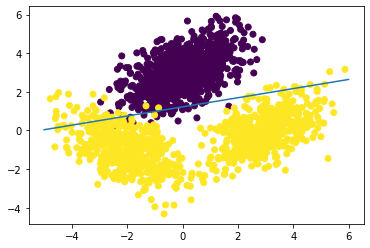

In [55]:
import matplotlib.pyplot as plt
predictions = model(inputs)
x1 = np.linspace(-5, 6, 100)
x2 = (0.5-b-W[0]*x1)/W[1]
plt.scatter(inputs[:,0], inputs[:,1], c=targets[:,0])
# plt.scatter(inputs[:,0], inputs[:,1], c=predictions[:,0]>0.5)
plt.plot(x1,x2); plt.show()


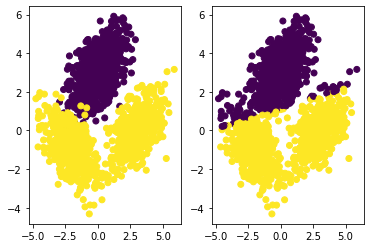

In [65]:
import matplotlib.pyplot as plt
predictions = model(inputs)
x1 = np.linspace(-5, 6, 100)
x2 = (0.5-b-W[0]*x1)/W[1]
plt.subplot(121);plt.scatter(inputs[:,0], inputs[:,1], c=targets[:,0])
plt.subplot(122);plt.scatter(inputs[:,0], inputs[:,1], c=predictions[:,0]>0.5)
# plt.plot(x1,x2); plt.show()


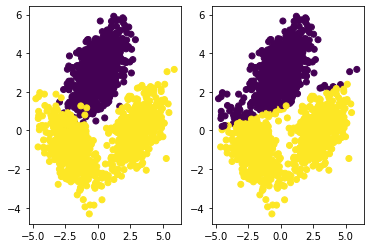

In [68]:
import matplotlib.pyplot as plt
predictions = model(inputs)
x1 = np.linspace(-5, 6, 100)
x2 = (0.5-b-W[0]*x1)/W[1]
plt.subplot(121);plt.scatter(inputs[:,0], inputs[:,1], c=targets[:,0])
plt.subplot(122);plt.scatter(inputs[:,0], inputs[:,1], c=predictions[:,0]>0.5)


In [69]:
class Linear(tf.keras.layers.Layer):
    def __init__(self, units=32, input_dim=32):
        super(Linear, self).__init__()
        w_init = tf.random_normal_initializer()
        self.w = tf.Variable(initial_value=w_init(shape=(input_dim, units), dtype="float32"), trainable=True)
        b_init = tf.zeros_initializer()
        self.b = tf.Variable(initial_value=b_init(shape=(units,), dtype="float32"), trainable=True)

    def call(self, inputs):
        return tf.matmul(inputs, self.w) + self.b


In [74]:
linear_layer = Linear(units=4, input_dim=2)
y = linear_layer(tf.ones((5, 2)))
assert y.shape == (5, 4)


In [75]:
assert linear_layer.weights == [linear_layer.w, linear_layer.b]


In [77]:
print(linear_layer.weights)

[<tf.Variable 'Variable:0' shape=(2, 4) dtype=float32, numpy=
array([[ 0.05158884,  0.07756861, -0.03042542, -0.02768703],
       [-0.03166839,  0.03370262, -0.04830639,  0.06291753]],
      dtype=float32)>, <tf.Variable 'Variable:0' shape=(4,) dtype=float32, numpy=array([0., 0., 0., 0.], dtype=float32)>]


In [78]:
for param in linear_layer.weights:
    print(param)

<tf.Variable 'Variable:0' shape=(2, 4) dtype=float32, numpy=
array([[ 0.05158884,  0.07756861, -0.03042542, -0.02768703],
       [-0.03166839,  0.03370262, -0.04830639,  0.06291753]],
      dtype=float32)>
<tf.Variable 'Variable:0' shape=(4,) dtype=float32, numpy=array([0., 0., 0., 0.], dtype=float32)>


In [81]:
from tensorflow.keras import Sequential
model = Sequential()
model.add(Linear(input_dim=2, units=5))
model.add(Linear(input_dim=5, units=8))

In [83]:
class Linear(tf.keras.layers.Layer):
    def __init__(self, units=32):
        super(Linear, self).__init__()
        self.units = units
    def build(self, input_shape):
        self.w = self.add_weight(
            shape=(input_shape[-1], self.units),
            initializer="random_normal",
            trainable=True)
        self.b = self.add_weight(
            shape=(self.units,), initializer=
            "random_normal", trainable=True)
    def call(self, inputs):
        return tf.matmul(inputs, self.w) + self.b


In [85]:
linear_layer = Linear(4)
y = linear_layer(tf.ones((2, 2)))
print(y)

tf.Tensor(
[[-0.00190961  0.18402965  0.08544546  0.06674473]
 [-0.00190961  0.18402965  0.08544546  0.06674473]], shape=(2, 4), dtype=float32)


In [87]:
from tensorflow.keras import Sequential
model = Sequential()
model.add(Linear(units=5))
model.add(Linear(units=8))

In [88]:
y = model(tf.ones((3,2)))

In [90]:
print(y, y.shape)

tf.Tensor(
[[-0.02643226 -0.0399864   0.0125443  -0.07533265  0.01520482  0.02524104
   0.01725054 -0.05354665]
 [-0.02643226 -0.0399864   0.0125443  -0.07533265  0.01520482  0.02524104
   0.01725054 -0.05354665]
 [-0.02643226 -0.0399864   0.0125443  -0.07533265  0.01520482  0.02524104
   0.01725054 -0.05354665]], shape=(3, 8), dtype=float32) (3, 8)


In [104]:
class Nonlinear(tf.keras.layers.Layer):
    def __init__(self, units=32, activation=None):
        super(Nonlinear, self).__init__()
        self.units = units
        self.activation = activation
    def build(self, input_shape):
        self.w = self.add_weight(
            shape=(input_shape[-1], self.units),
            initializer="random_normal",
            trainable=True)
        self.b = self.add_weight(
            shape=(self.units,), initializer=
            "random_normal", trainable=True)
    def call(self, inputs):
        y = tf.matmul(inputs, self.w) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y


In [105]:
L = Nonlinear(units=4, activation=tf.nn.sigmoid)

In [106]:
y = L(tf.ones((2,3)))
print(y)

tf.Tensor(
[[0.4537161  0.5071994  0.47516975 0.48157063]
 [0.4537161  0.5071994  0.47516975 0.48157063]], shape=(2, 4), dtype=float32)


In [108]:
print(tf.nn.sigmoid(2.))

tf.Tensor(0.880797, shape=(), dtype=float32)


In [110]:
model = Sequential()
model.add(Nonlinear(units=10, activation=tf.nn.sigmoid))
model.add(Nonlinear(units=10, activation=tf.nn.sigmoid))
model.add(Nonlinear(units=10, activation=tf.nn.sigmoid))
model.add(Nonlinear(units=10, activation=tf.nn.sigmoid))
model.add(Nonlinear(units=1, activation=tf.nn.sigmoid))


In [111]:
model.compile(loss='mse', optimizer='adam')


In [114]:
h = model.fit(inputs, targets, epochs=100, verbose=0)

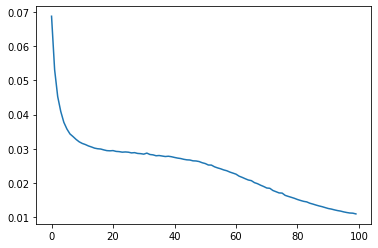

In [115]:
plt.plot(h.epoch, h.history["loss"])

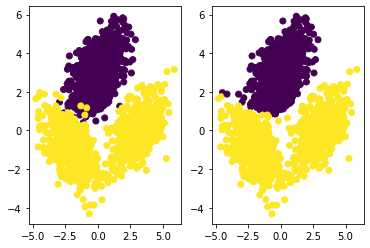

In [116]:
predictions = model(inputs)
x1 = np.linspace(-5, 6, 100)
x2 = (0.5-b-W[0]*x1)/W[1]
plt.subplot(121);plt.scatter(inputs[:,0], inputs[:,1], c=targets[:,0])
plt.subplot(122);plt.scatter(inputs[:,0], inputs[:,1], c=predictions[:,0]>0.5)
